# Manifold learning

## What is a manifold?

Manifolds are multi-dimensional surfaces that could look flat if you're up really really close but from far away are curved. The classic example of a manifold is a torus, or "donut", of which all of the below are from.

![](figures/torii.jpg)

The idea behind  manifold embedding algorithms is to maintain the high dimensional structure of the manifold, but plot the data in two dimensions.

The math behind these algorithms is actually quite simple. We want to convert each point in high dimensions to a point in two dimensions:

* High dimensional data of samples $\vec{x}_i$ in $N$-dimensional gene space: $\vec{x}_1, \vec{x}_2, \ldots \vec{x}_N$
* Low dimensional data $\vec{y}_i = \vec{y}_{i, 1}, \vec{y}_{i, 2}$ (2-dimensional cartesian plane) - $\vec{y}_1, \vec{y}_2, \ldots \vec{y}_N$

Visually, you can think of converting each high $N$-dimensional sample $i$'s gene expression vector $x_i$ to a length 2 vector:

<center>
$
\begin{bmatrix}
           x_{i, 1} \\
           x_{i, 2} \\
           \vdots \\
           x_{i, N}
\end{bmatrix} \rightarrow \begin{bmatrix}
           y_{i, 1} \\
           y_{i, 2}
\end{bmatrix}
         $
</center>

We'll compare MDS and t-SNE side by side once we get a brief introduction to both.


## Multidimensional scaling (MDS)

Multidimensional scaling is an algorithm which faithfully maintains all pairwise distances between the points in the dataset.

## t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is an extension of MDS. In addition to maintaining pairwise distances, t-SNE adds the constraint that things that were far apart in the high-dimensional data should also be far apart in 2d, and that things that are close together in high dimensions should stay close together.

MDS: 2.5 sec
t-SNE: 3.8 sec


/Users/olga/anaconda3/envs/single-cell-bioinformatics-v3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


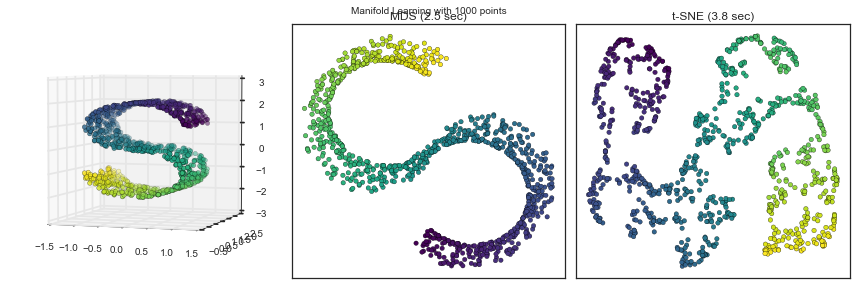

In [1]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA 
import seaborn as sns
sns.set(style='white', context='notebook')
import ipywidgets

%matplotlib inline


### Manifold learning dimensionality reduction: MDS and t-SNE

cmap = plt.cm.viridis

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>


import scipy
from time import time
import warnings

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

def compare_mds_tsne(stddev=0, metric='euclidean', tsne_init='pca'):
    n_points = 1000
    random_state = 0
    X, sample_order = datasets.samples_generator.make_s_curve(n_points, random_state=0)

    if stddev > 0:
        X = X + np.random.normal(size=np.product(X.shape), scale=0.1).reshape(X.shape)
        

    fig = plt.figure(figsize=(12, 4))
    plt.suptitle("Manifold Learning with %i points" % (n_points))
    
    # Plot original data
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=sample_order, cmap=cmap)
    ax.view_init(4, -72)

    # Add noise if necessary
    n_components = 2
    smusher_kws = dict(n_components=n_components, random_state=random_state)
    tsne_kws = dict(init=tsne_init)
    
    if metric != 'euclidean':
        X = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, metric=metric))
        smusher_kws['metric'] = 'precomputed'
        
        print('FYI not initializing t-SNE with PCA since distances are precomputed')
        tsne_kws.pop('init')
    tsne_kws.update(smusher_kws)
    

    # Perform MDS and plot it
    t0 = time()
    mds = manifold.MDS(max_iter=100, n_init=1, **smusher_kws)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(1, 3, 2)
    plt.scatter(Y[:, 0], Y[:, 1], c=sample_order, cmap=cmap)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    # Perform t-SNE and plot it
    t0 = time()
    tsne = manifold.TSNE(**tsne_kws)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(1,3,3)
    plt.scatter(Y[:, 0], Y[:, 1], c=sample_order, cmap=cmap)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    plt.show()
    



ipywidgets.interact(compare_mds_tsne, 
                    metric=ipywidgets.Dropdown(options=['euclidean', 'cityblock'], 
                                               value='euclidean', description="Distance Metric"), 
                    tsne_init=['random', 'pca'], 
                    n_points=ipywidgets.IntSlider(value=1000, min=50, max=2000, step=50),
#                     random_state=ipywidgets.IntSlider(value=0, min=0, max=10),
                    stddev=ipywidgets.FloatSlider(value=0, min=0, max=1, 
                                                  description='Add Noise? (value = std dev of normal distribution)', step=0.1));

## Quiz 2.4.1

While you're playing with the sliders above, work on this [quiz](https://docs.google.com/forms/d/1pTfYEZdUsV2PQ5aD4Lo8O__mlp9SmfNFwYCmOPVUMU8/viewform).